In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
flood=pd.read_csv(r"D:\datas\project1\district_wise_details.csv")

In [2]:
flood

,district,fatalities,no_of_camps,actual_rainfall_in_mm,normal_rainfall_in_mm,no_of_landslides,full_damaged_houses
0,Thiruvananthapuram,11,94,373.8,142.0,0,111
1,Kollam,5,168,644.1,258.7,2,95
2,Pathanamthitta,3,4352,764.9,352.7,8,741
3,Alappuzha,43,2126,608.2,343.1,0,2075
4,Kottayam,14,788,619.2,386.0,29,76
5,Idukki,54,363,1478.9,527.3,143,1166
6,Ernakulam,58,1582,648.3,401.3,0,615
7,Thrissur,72,1513,734.7,440.1,26,2889
8,Palakkad,20,165,848.8,333.8,20,1118
9,Malappuram,30,213,913.7,395.3,30,500


In [3]:
flood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   district               14 non-null     object 
 1   fatalities             14 non-null     int64  
 2   no_of_camps            14 non-null     int64  
 3   actual_rainfall_in_mm  14 non-null     float64
 4   normal_rainfall_in_mm  14 non-null     float64
 5   no_of_landslides       14 non-null     int64  
 6   full_damaged_houses    14 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 912.0+ bytes


In [4]:
flood.describe()

,fatalities,no_of_camps,actual_rainfall_in_mm,normal_rainfall_in_mm,no_of_landslides,full_damaged_houses
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,24.214286,875.214286,773.307143,417.950000,23.642857,737.071429
std,23.344176,1201.089709,260.248297,133.874509,37.300458,849.385159
min,1.000000,2.000000,373.800000,142.000000,0.000000,3.000000
25%,6.000000,165.750000,638.700000,345.500000,0.500000,108.000000
50%,15.000000,381.000000,700.000000,398.300000,13.000000,557.500000
75%,39.750000,1331.750000,845.600000,520.700000,28.250000,1023.750000
max,72.000000,4352.000000,1478.900000,636.300000,143.000000,2889.000000


In [5]:
flood_corr=flood.corr().round(2)
flood_corr

,fatalities,no_of_camps,actual_rainfall_in_mm,normal_rainfall_in_mm,no_of_landslides,full_damaged_houses
fatalities,1.00,0.16,0.27,-0.00,0.34,0.76
no_of_camps,0.16,1.00,-0.09,-0.18,-0.18,0.39
actual_rainfall_in_mm,0.27,-0.09,1.00,0.50,0.89,0.20
normal_rainfall_in_mm,-0.00,-0.18,0.50,1.00,0.36,-0.02
no_of_landslides,0.34,-0.18,0.89,0.36,1.00,0.19
full_damaged_houses,0.76,0.39,0.20,-0.02,0.19,1.00


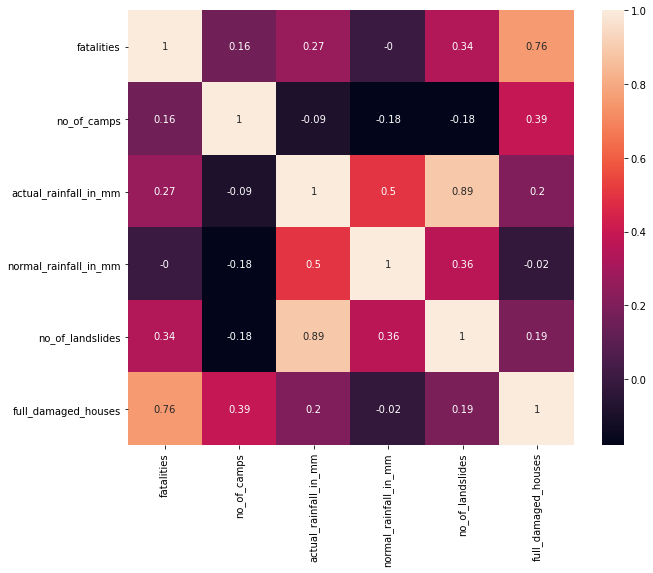

In [6]:
plt.figure(figsize=(10,8))
plot=sn.heatmap(flood_corr,annot=True)

From the correlation matrix,the no of camps  and normal rainfall are less correlated so we can neglect these features

In [7]:
flood_1=flood.drop(['district','no_of_camps','normal_rainfall_in_mm'],axis='columns')
flood_1

,fatalities,actual_rainfall_in_mm,no_of_landslides,full_damaged_houses
0,11,373.8,0,111
1,5,644.1,2,95
2,3,764.9,8,741
3,43,608.2,0,2075
4,14,619.2,29,76
5,54,1478.9,143,1166
6,58,648.3,0,615
7,72,734.7,26,2889
8,20,848.8,20,1118
9,30,913.7,30,500


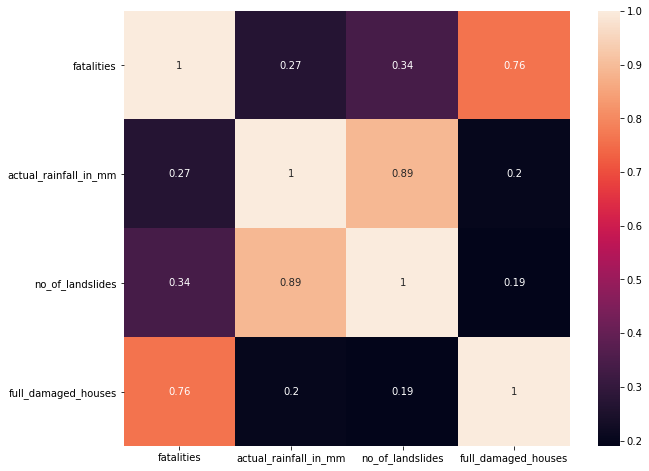

In [8]:
flood_corr1=flood_1.corr().round(2)
flood_corr1
plt.figure(figsize=(10,8))
plot=sn.heatmap(flood_corr1,annot=True)

From this we can understand that fatalities are highly correlated to the fully damaged houses.landslides are highly correlated with actual rain

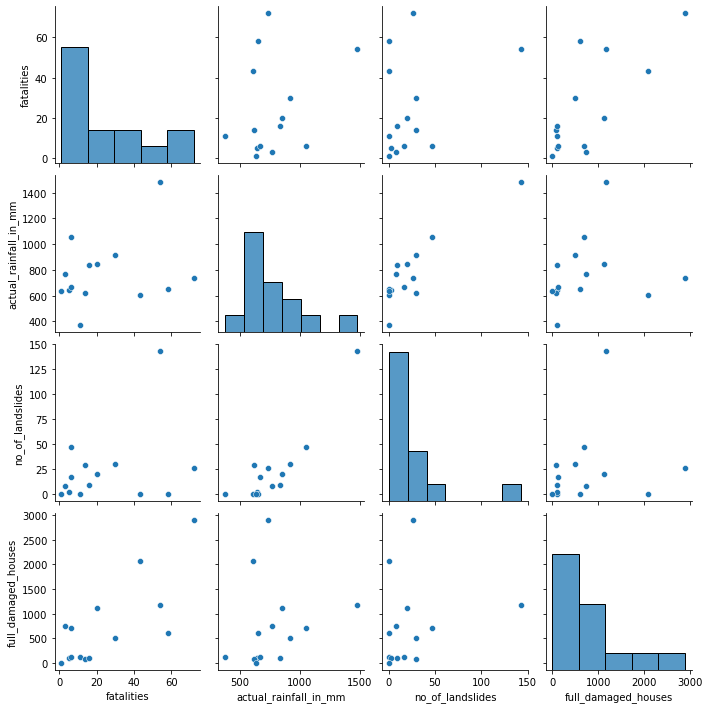

In [9]:
sn.pairplot(flood_1)

In [10]:
flood_1.head(2)

,fatalities,actual_rainfall_in_mm,no_of_landslides,full_damaged_houses
0,11,373.8,0,111
1,5,644.1,2,95


### Training the model

In [11]:
from sklearn.linear_model import LinearRegression
fatality_model=LinearRegression()
X=flood_1.drop('fatalities',axis='columns')
Y=flood_1[['fatalities']]
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.1)

In [12]:
fatality_model.fit(x_train,y_train)

LinearRegression()

In [13]:
fatality_model.score(x_test,y_test)

-1.9877831303444071

In [14]:
y_test

,fatalities
3,43
9,30


In [15]:
fatality_model.predict(x_test)

array([[50.82043361],
       [16.16856867]])

Here our problem lies in the less no of data set. Now we can go for cross validation 

In [16]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [17]:
y_predicted=km.fit_predict(flood_1[['fatalities','no_of_landslides','full_damaged_houses','actual_rainfall_in_mm']])
y_predicted

array([2, 2, 0, 1, 2, 0, 0, 1, 0, 0, 2, 0, 2, 2])

In [18]:
flood_1['cluster']=y_predicted
flood_1

,fatalities,actual_rainfall_in_mm,no_of_landslides,full_damaged_houses,cluster
0,11,373.8,0,111,2
1,5,644.1,2,95,2
2,3,764.9,8,741,0
3,43,608.2,0,2075,1
4,14,619.2,29,76,2
5,54,1478.9,143,1166,0
6,58,648.3,0,615,0
7,72,734.7,26,2889,1
8,20,848.8,20,1118,0
9,30,913.7,30,500,0


In [19]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(flood_1[['fatalities','no_of_landslides','full_damaged_houses','actual_rainfall_in_mm']])
    sse.append(km.inertia_)

D:\python\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
sse

[10284567.789285716,
 3153033.575,
 1275836.7550000004,
 774025.1186666667,
 433967.4936666666,
 250771.04166666666,
 166766.54166666666,
 87587.09999999999,
 56320.13749999999]

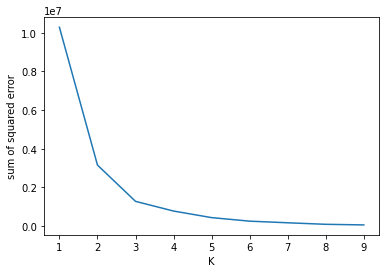

In [21]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

No handles with labels found to put in legend.


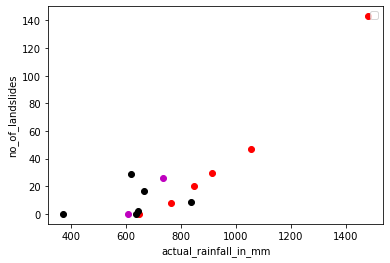

In [22]:
df1=flood_1[flood_1.cluster==0]
df2=flood_1[flood_1.cluster==1]
df3=flood_1[flood_1.cluster==2]
plt.scatter(df1.actual_rainfall_in_mm,df1['no_of_landslides'],color='r')
plt.scatter(df2.actual_rainfall_in_mm,df2['no_of_landslides'],color='m')
plt.scatter(df3.actual_rainfall_in_mm,df3['no_of_landslides'],color='black')
plt.xlabel('actual_rainfall_in_mm')
plt.ylabel('no_of_landslides')
plt.legend()

No handles with labels found to put in legend.


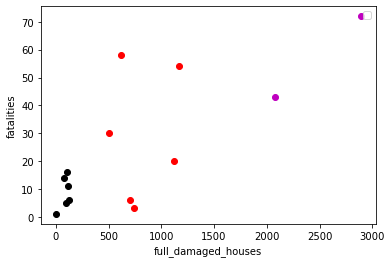

In [23]:
df1=flood_1[flood_1.cluster==0]
df2=flood_1[flood_1.cluster==1]
df3=flood_1[flood_1.cluster==2]
plt.scatter(df1.full_damaged_houses,df1['fatalities'],color='r')
plt.scatter(df2.full_damaged_houses,df2['fatalities'],color='m')
plt.scatter(df3.full_damaged_houses,df3['fatalities'],color='black')
plt.xlabel('full_damaged_houses')
plt.ylabel('fatalities')
plt.legend()

In [24]:
scalar=MinMaxScaler()
scalar.fit(flood_1[['fatalities']])
scalar.fit(flood_1[['no_of_landslides']])
scalar.fit(flood_1[['full_damaged_houses']])
scalar.fit(flood_1[['actual_rainfall_in_mm']])

flood_1['fatalities']=scalar.transform(flood_1[['fatalities']])
flood_1['no_of_landslides']=scalar.transform(flood_1[['no_of_landslides']])
flood_1['full_damaged_houses']=scalar.transform(flood_1[['full_damaged_houses']])
flood_1['actual_rainfall_in_mm']=scalar.transform(flood_1[['actual_rainfall_in_mm']])
flood_1

,fatalities,actual_rainfall_in_mm,no_of_landslides,full_damaged_houses,cluster
0,-0.328296,0.000000,-0.338250,-0.237807,2
1,-0.333725,0.244593,-0.336440,-0.252285,2
2,-0.335535,0.353905,-0.331011,0.332278,0
3,-0.299339,0.212108,-0.338250,1.539408,1
4,-0.325581,0.222061,-0.312008,-0.269478,2
5,-0.289386,1.000000,-0.208850,0.716858,0
6,-0.285766,0.248394,-0.338250,0.218261,0
7,-0.273097,0.326577,-0.314723,2.275993,1
8,-0.320152,0.429825,-0.320152,0.673423,0
9,-0.311103,0.488553,-0.311103,0.114198,0


No handles with labels found to put in legend.


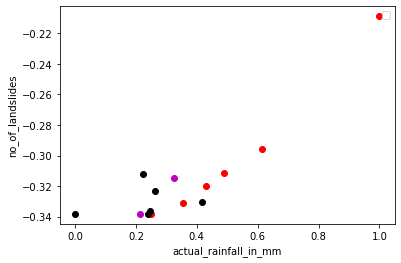

In [25]:
df1=flood_1[flood_1.cluster==0]
df2=flood_1[flood_1.cluster==1]
df3=flood_1[flood_1.cluster==2]
plt.scatter(df1.actual_rainfall_in_mm,df1['no_of_landslides'],color='r')
plt.scatter(df2.actual_rainfall_in_mm,df2['no_of_landslides'],color='m')
plt.scatter(df3.actual_rainfall_in_mm,df3['no_of_landslides'],color='black')
plt.xlabel('actual_rainfall_in_mm')
plt.ylabel('no_of_landslides')
plt.legend()

No handles with labels found to put in legend.


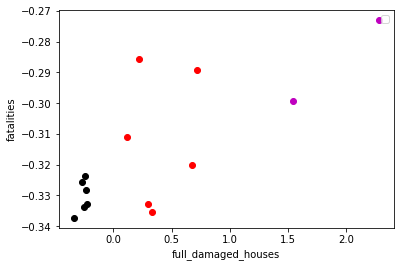

In [26]:
df1=flood_1[flood_1.cluster==0]
df2=flood_1[flood_1.cluster==1]
df3=flood_1[flood_1.cluster==2]
plt.scatter(df1.full_damaged_houses,df1['fatalities'],color='r')
plt.scatter(df2.full_damaged_houses,df2['fatalities'],color='m')
plt.scatter(df3.full_damaged_houses,df3['fatalities'],color='black')
plt.xlabel('full_damaged_houses')
plt.ylabel('fatalities')
plt.legend()

### Visualisation

([<matplotlib.patches.Wedge at 0x1e7da5e81c0>,
 [Text(2.2, 0.0, 'Thiruvananthapuram'),
  Text(2.1996036458657047, 0.04175884450390846, 'Kollam'),
  Text(2.1857462409874238, 0.2500267385887929, 'Pathanamthitta'),
  Text(2.1604822732469278, 0.41511004201993046, 'Alappuzha'),
  Text(1.9663387731555833, 0.986667030555393, 'Kottayam'),
  Text(-1.106022274383114, 1.9017662129106208, 'Idukki'),
  Text(-2.0929685962999742, -0.6778513516266803, 'Ernakulam'),
  Text(-1.8639824740402469, -1.1685757726697918, 'Thrissur'),
  Text(-1.1949934288100235, -1.8471574662439756, 'Palakkad'),
  Text(-0.2188842342312522, -2.1890842130911725, 'Malappuram'),
  Text(0.5878686800226613, -2.12000245637792, 'Kozhikode'),
  Text(1.5812577650788888, -1.529582910592858, 'Wayanad'),
  Text(2.1714246466182128, -0.35343316774033984, 'Kannur'),
  Text(2.1999999999999975, 1.0298943315351296e-07, 'Kasaragode')],
 [Text(1.2, 0.0, '0.0%'),
  Text(1.1997838068358386, 0.02277755154758643, '0.6%'),
  Text(1.1922252223567764, 0.

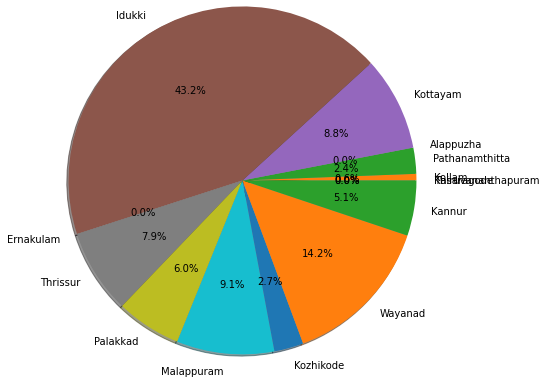

In [42]:
plt.pie(flood.no_of_landslides,shadow=True,labels=flood.district, radius=2,autopct='%1.1f%%')